In [1]:
CHURN PREDICTION

SyntaxError: invalid syntax (<ipython-input-1-ffa8ba19c208>, line 1)

In [ ]:
Data Description: Given a Bank customer, can we build a classifier that can determine whether they will leave or not using Neural networks?


The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Know your data: https://www.kaggle.com/barelydedicated/bank-
customer-churn-modeling.

In [2]:
#1) Read the data set.

In [3]:
# Importing library
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats

In [4]:
# Reading the dataset
cp=pd.read_csv("G:/R6 -  Neural Networks Project/bank.csv")
cp.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
cp.shape

(10000, 14)

In [7]:
cp.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
# c) Checking presence of missing values
cp.isna().apply(pd.value_counts)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
False,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000


In [9]:
cp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [10]:
# Checking columns list and for missing values
cp.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
 # Get unique count for each variable
cp.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [12]:
cp = cp.drop(['CustomerId'], axis = 1)

In [13]:
cp.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
cp = cp.drop(['RowNumber'], axis = 1)

In [15]:
cp.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
cp = cp.drop(['Surname'], axis = 1)

In [17]:
cp.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
cp = cp.drop(['Geography'], axis = 1)

In [50]:
cp = cp.drop(['Gender'], axis = 1)

In [51]:
cp.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2208,728,46,2,109705.52,1,1,0,20276.87,1
420,756,60,3,115924.89,1,1,0,93524.19,1
7741,441,60,1,140614.15,1,0,1,174381.23,0
2823,668,59,5,120170.07,1,0,1,50454.80,0
2497,613,20,3,0.00,2,1,1,149613.77,0


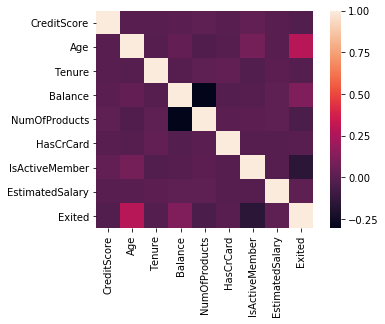

In [52]:
correlation = cp.corr()
sns.heatmap(correlation.T, square=True, annot=False, fmt="d", cbar=True)

In [ ]:
# The above heatmap easily depict how different features correlate among themselves (including against the target feature: "Exited").

# Trends from the heatmap visualization:

# All features have a weak or strong correlation with the target (Thus we are considering all of them for our model)
# Age, Balance, NumOfProducts, IsActiveMember, CreditScore are the features with significant correlation.

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


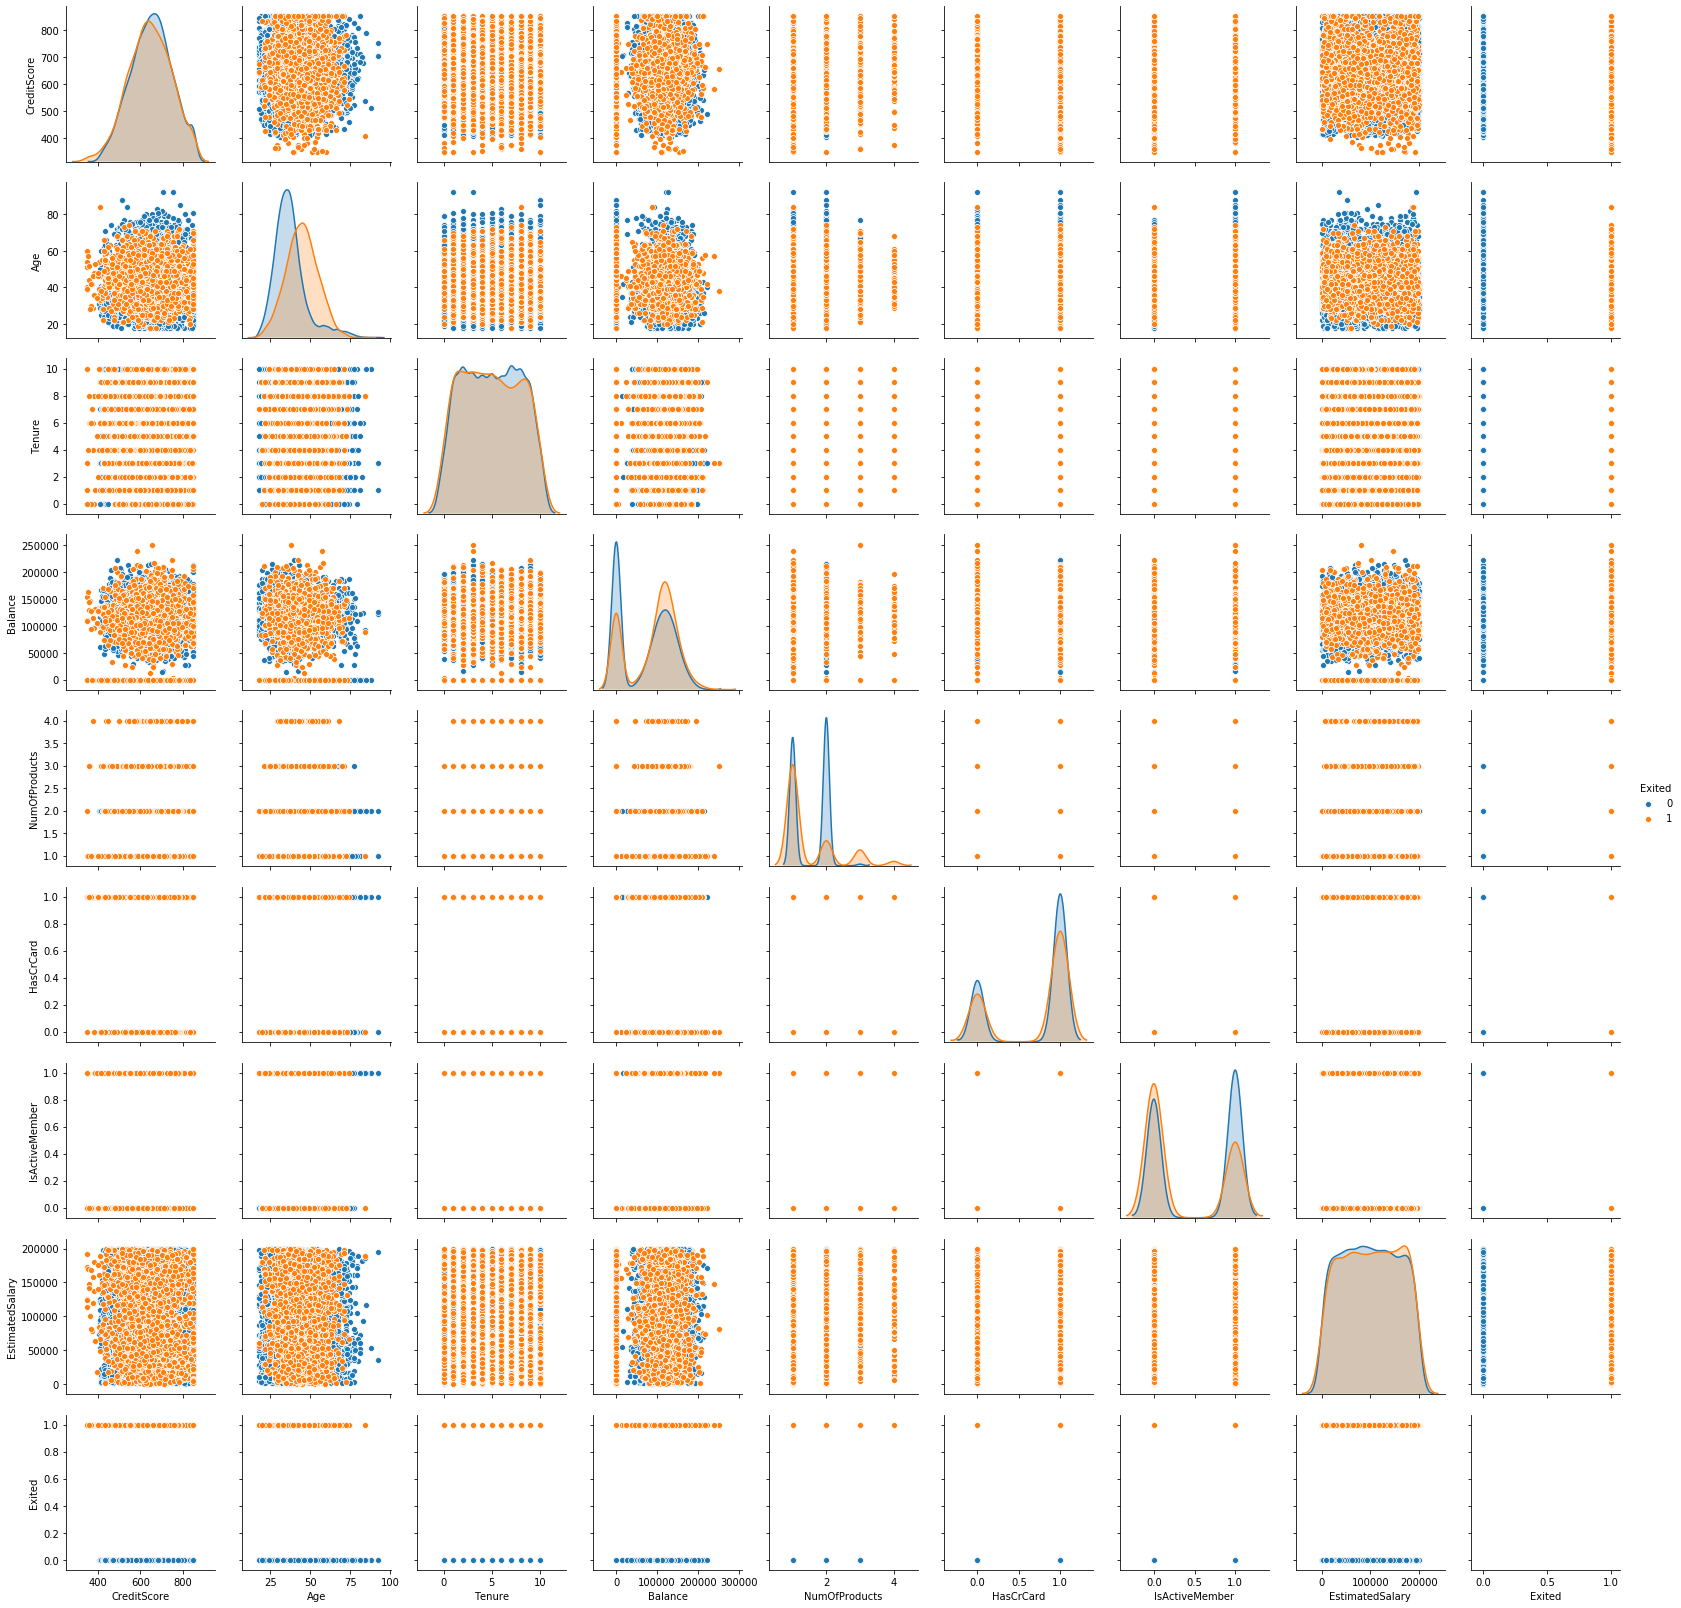

In [53]:
#Let us check for pair plots
sns.pairplot (cp,hue='Exited')

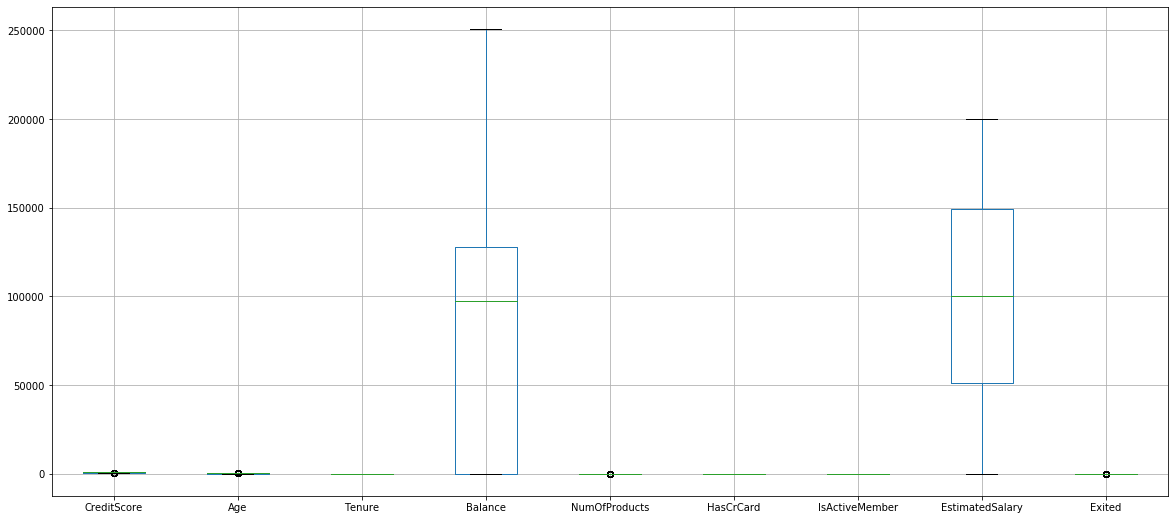

In [55]:
cp.boxplot(figsize=(20,9))

In [ ]:
# 4) Divide the data set into training and test sets ( 2.5 points)

In [ ]:
# 1. Preparing the data

# a. Shuffle the data (to randomize all data)

# b. Split feature data from the target (To easily differentiate what is being predicted from determinants)

# c. Split feature data and target into training and testing sets (For validation accuracy)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # K neighbors classification model
from sklearn.naive_bayes import GaussianNB # Gaussian Naive bayes classification model
from sklearn.svm import SVC # Support Vector Classifier model
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier model
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier model
from sklearn.metrics import accuracy_score # For checking the accuracy of the model

In [56]:
cp =cp.reindex(np.random.permutation(cp.index))

In [79]:
# Splitting feature data from the target
X = cp.drop("Exited", axis=1)
y = cp["Exited"]

In [80]:
# Splitting feature data and target into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# 5) Normalize the train and test data (5 points)

In [81]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score

In [82]:
cp.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8616,653,27,6,107751.68,2,1,1,33389.42,0
9358,837,29,9,0.00,2,1,1,41866.26,0
9437,670,27,5,79336.61,1,1,1,26170.08,0
73,604,25,5,157780.84,2,1,1,58426.81,0
8644,716,29,8,0.00,2,0,0,78616.92,0


In [62]:
x=cp.iloc[:,3:-1].values
y=cp.iloc[:,-1].values

In [63]:
Label_x1=LabelEncoder()
Label_x2=LabelEncoder()

x[:,1]=Label_x1.fit_transform(x[:,1])
x[:,2]=Label_x2.fit_transform(x[:,2])

In [64]:
cp.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8616,653,27,6,107751.68,2,1,1,33389.42,0
9358,837,29,9,0.00,2,1,1,41866.26,0
9437,670,27,5,79336.61,1,1,1,26170.08,0
73,604,25,5,157780.84,2,1,1,58426.81,0
8644,716,29,8,0.00,2,0,0,78616.92,0


In [65]:
# Label Encoder Categorical Data [1:2]
Label_x1=LabelEncoder()
Label_x2=LabelEncoder()

x[:,1]=Label_x1.fit_transform(x[:,1])
x[:,2]=Label_x2.fit_transform(x[:,2])

In [66]:
#Let's Switch This Label to Coulmn
OneHotEncoder=OneHotEncoder(categorical_features=[1])
x=OneHotEncoder.fit_transform(x).toarray()

#removing Dummy Variable
x=x[:,1:]

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [ ]:
# 6) Initialize & build the model (10 points)

In [83]:
# Gaussian Bayes Naive Classification
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.775

In [84]:
# Logistic Regression
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.784

In [86]:
# Decision Tree Classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.7655

In [87]:
# Random Forest Classifier
clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.851

In [95]:
scaler = MinMaxScaler() 

bumpy_features = ["CreditScore", "Age", "Balance",'EstimatedSalary']

cp_scaled = pd.DataFrame(data = X)
cp_scaled[bumpy_features] = scaler.fit_transform(X[bumpy_features])

In [ ]:
# 7) Predict the results using 0.5 as a threshold 

In [96]:
cp_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8616,0.606,0.121622,6,0.429464,2,1,1,0.166905
9358,0.974,0.148649,9,0.000000,2,1,1,0.209293
9437,0.640,0.121622,5,0.316210,1,1,1,0.130805
73,0.508,0.094595,5,0.628864,2,1,1,0.292104
8644,0.732,0.148649,8,0.000000,2,0,0,0.393064


In [ ]:
# Prediction of results

In [108]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

Accuracy: 0.851
Precision: 0.7713004484304933
Recall: 0.4105011933174224
F1: 0.5358255451713394
Area under precision (AUC) Recall: 0.4401197544869805


In [ ]:
# 8) Print the Accuracy score and confusion matrix (2.5 points)

In [110]:
# Accuracy Score
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))

Accuracy: 0.851
Precision: 0.7713004484304933


In [109]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[1530,   51],
       [ 247,  172]], dtype=int64)